In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
# считываем данные
train = pd.read_csv("/Users/ar.galanin/Documents/coding/DataScience/oilgas-field-prediction/train_oil.csv")
test = pd.read_csv("/Users/ar.galanin/Documents/coding/DataScience/oilgas-field-prediction/oil_test.csv")
print(train.shape)
print(test.shape)

(309, 20)
(133, 19)


In [211]:
train.drop(['Field name','Reservoir unit', 'Operator company', 'Basin name','Country'], axis=1, inplace=True)
test.drop(['Field name','Reservoir unit', 'Basin name','Operator company','Country'], axis=1, inplace=True)

In [161]:
# смотрим пропущенные значения
print("Number of missing values in train dataset:")
print(train.isna().sum())
print("Number of missing values in test dataset:")
print(test.isna().sum())

Number of missing values in train dataset:
Region                            38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64
Number of missing values in test dataset:
Region                            16
Tectonic regime                    0
Latitude                          13
Longitude                         16
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology     

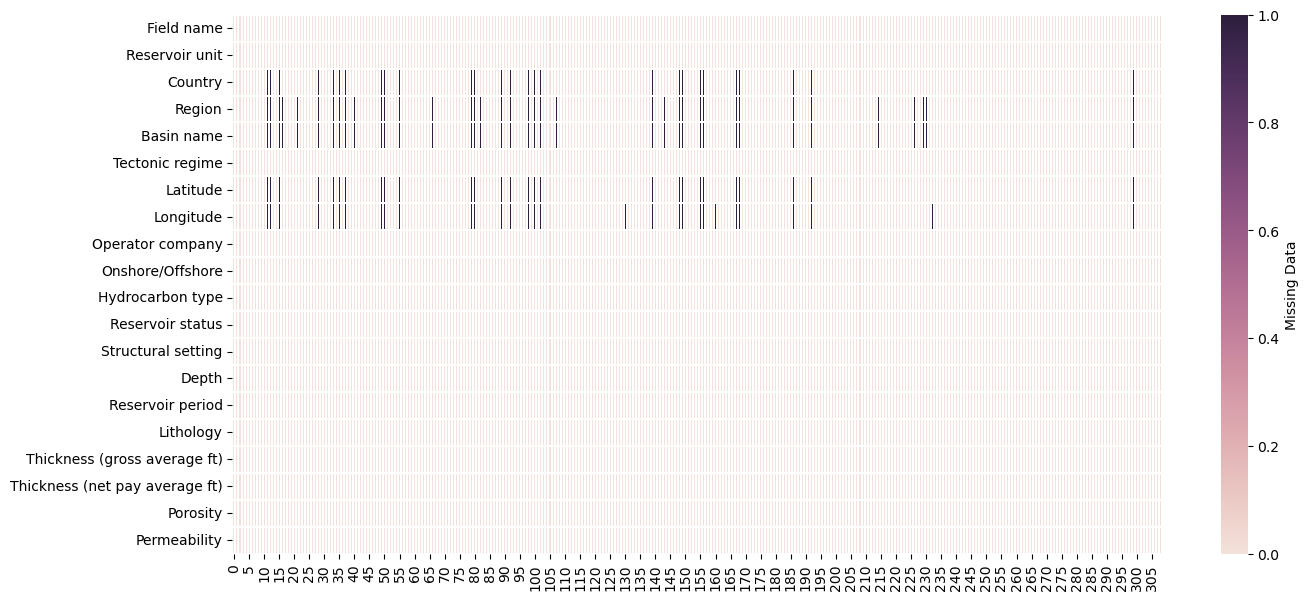

In [4]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [76]:
train.dtypes

Region                             object
Latitude                          float64
Longitude                         float64
Onshore/Offshore                   object
Hydrocarbon type                   object
Reservoir status                   object
Depth                               int64
Reservoir period                   object
Lithology                          object
Thickness (gross average ft)      float64
Thickness (net pay average ft)    float64
Porosity                          float64
Permeability                      float64
BASEMENT-I                          int64
COMPRESSION                         int64
DIAPIR                              int64
EROSION                             int64
EVAPORITE                           int64
EXTENSION                           int64
GRAVITY                             int64
INVERSION1                          int64
LINKED                              int64
REACTIVATION                        int64
SHALE                             

In [212]:
# Заполнение пропущенных значения средним

train['Latitude'].fillna(train['Latitude'].mean(), inplace=True)
train['Longitude'].fillna(train['Longitude'].mean(), inplace=True)
test['Latitude'].fillna(test['Latitude'].mean(), inplace=True)
test['Longitude'].fillna(test['Longitude'].mean(), inplace=True)

In [213]:
# Заполняем пропущенные значения модой
train['Region'].fillna(train['Region'].mode()[0], inplace=True)
test['Region'].fillna(test['Region'].mode()[0], inplace=True)



In [214]:
# Замена всех вхождений определенного элемента в столбце на другой
train['Tectonic regime'] = train['Tectonic regime'].str.replace('INVERSION', 'INVERSION1')
test['Tectonic regime'] = test['Tectonic regime'].str.replace('INVERSION', 'INVERSION1')

In [215]:
# Кодируем признаки, объекты в которых состоят из нескольких признаков

encode_train1 = train['Tectonic regime'].str.get_dummies(sep='/')
train = pd.concat([train, encode_train1], axis=1)

encode_train2 = train['Structural setting'].str.get_dummies(sep='/')
train = pd.concat([train, encode_train2], axis=1)

encode_test1 = test['Tectonic regime'].str.get_dummies(sep='/')
test = pd.concat([test, encode_test1], axis=1)

encode_test2 = test['Structural setting'].str.get_dummies(sep='/')
test = pd.concat([test, encode_test2], axis=1)

train.drop(['Tectonic regime','Structural setting'], axis=1, inplace=True)
test.drop(['Tectonic regime','Structural setting'], axis=1, inplace=True)

In [75]:
train.columns.tolist()

['Region',
 'Latitude',
 'Longitude',
 'Onshore/Offshore',
 'Hydrocarbon type',
 'Reservoir status',
 'Depth',
 'Reservoir period',
 'Lithology',
 'Thickness (gross average ft)',
 'Thickness (net pay average ft)',
 'Porosity',
 'Permeability',
 'BASEMENT-I',
 'COMPRESSION',
 'DIAPIR',
 'EROSION',
 'EVAPORITE',
 'EXTENSION',
 'GRAVITY',
 'INVERSION1',
 'LINKED',
 'REACTIVATION',
 'SHALE',
 'STRIKE-SLIP',
 'SYNSEDIMENTATION',
 'TRANSPRESSION',
 'TRANSTENSION',
 'UPLIFT',
 'BACKARC',
 'DELTA',
 'FOREARC',
 'FORELAND',
 'INTRACRATONIC',
 'INVERSION',
 'PASSIVE MARGIN',
 'RIFT',
 'SALT',
 'SUB-SALT',
 'SUB-THRUST',
 'THRUST',
 'WRENCH']

In [144]:
train.dtypes

Region                             object
Latitude                          float64
Longitude                         float64
Onshore/Offshore                   object
Hydrocarbon type                   object
Reservoir status                   object
Depth                               int64
Reservoir period                   object
Lithology                          object
Thickness (gross average ft)      float64
Thickness (net pay average ft)    float64
Porosity                          float64
Permeability                      float64
BASEMENT-I                          int64
COMPRESSION                         int64
DIAPIR                              int64
EROSION                             int64
EVAPORITE                           int64
EXTENSION                           int64
GRAVITY                             int64
INVERSION1                          int64
LINKED                              int64
REACTIVATION                        int64
SHALE                             

In [200]:
list(set(train.columns) - set(test.columns))

['Onshore/Offshore', 'REACTIVATION']

In [216]:
train.drop(['REACTIVATION'], axis = 1, inplace = True)

In [217]:
# Кодируем оставшиеся признаки
from sklearn import preprocessing

categ = ['Region', 'Hydrocarbon type', 'Reservoir status','Reservoir period','Lithology']
le = preprocessing.LabelEncoder()
train['Onshore/Offshore'] = le.fit_transform(train['Onshore/Offshore'])
for col in categ:
    le = preprocessing.LabelEncoder()
    train[col] = le.fit_transform(train[col])
    
    
for col in categ:
    le = preprocessing.LabelEncoder()
    
    test[col] = le.fit_transform(test[col])


In [218]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = train.drop(columns=['Onshore/Offshore'])
y = train['Onshore/Offshore']
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели градиентного бустинга с учетом балансировки классов
model = xgb.XGBClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
answers_pred = model.predict(X_test)

# Оценка качества модели
print(f'Accuracy: {accuracy_score(y_test, answers_pred)}')

Accuracy: 0.8548387096774194


In [131]:
print(train.shape)
print(test.shape)

(309, 42)
(133, 40)


In [219]:
predictions = model.predict(test)

In [220]:
predictions = pd.DataFrame(predictions, columns=['Onshore/Offshore'])
predictions = predictions.reset_index()
predictions=predictions.rename(columns={'index': 'Index'})

In [221]:
predictions['Onshore/Offshore'] = predictions['Onshore/Offshore'].replace(1,'ONSHORE')
predictions['Onshore/Offshore'] = predictions['Onshore/Offshore'].replace(0,'OFFSHORE')
predictions['Onshore/Offshore'] = predictions['Onshore/Offshore'].replace(2,'ONSHORE-OFFSHORE')


In [222]:
predictions.to_csv("predict.csv", index=False)

In [223]:
from IPython import display

# Создание ссылки для скачивания файла
display.FileLink("predict.csv")

/Users/ar.galanin/Documents/coding/DataScience/oilgas-field-prediction/predict.csv